# Capstone: Breast Cancer Wisconsin (Diagnostic)
Binary classification with Logistic Regression & Random Forest.

Logistic Regression {'accuracy': 0.9824561403508771, 'precision': 0.9861111111111112, 'recall': 0.9861111111111112, 'f1': 0.9861111111111112, 'roc_auc': np.float64(0.9953703703703703)}
Random Forest {'accuracy': 0.956140350877193, 'precision': 0.958904109589041, 'recall': 0.9722222222222222, 'f1': 0.9655172413793104, 'roc_auc': np.float64(0.9933862433862435)}


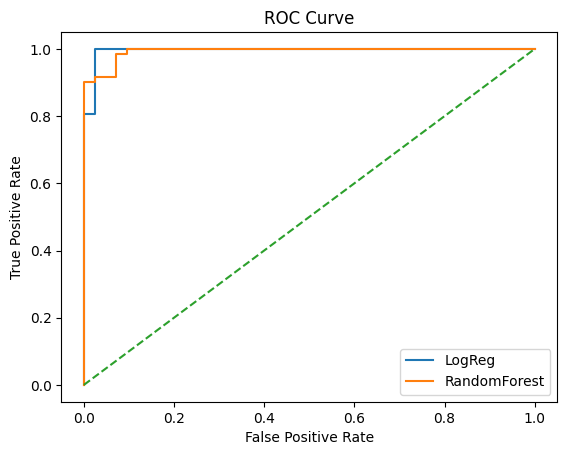

In [3]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score,
                             roc_curve, precision_recall_fscore_support, accuracy_score)

data = load_breast_cancer(as_frame=True)
df = data.frame.copy()
df.rename(columns={'target':'diagnosis'}, inplace=True)
X = df.drop(columns=['diagnosis']); y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))])
rf = RandomForestClassifier(n_estimators=400, random_state=42)

log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

def evaluate(model, name):
    y_prob = model.predict_proba(X_test)[:,1]
    y_pred = (y_prob >= 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
    auc = roc_auc_score(y_test, y_prob)
    print(name, {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1, "roc_auc": auc})

evaluate(log_reg, "Logistic Regression")
evaluate(rf, "Random Forest")

# ROC
fpr1, tpr1, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
fpr2, tpr2, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label="LogReg")
plt.plot(fpr2, tpr2, label="RandomForest")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(); plt.show()
